In [2]:
from graphlib.structures import Graph
from graphlib.algorithms import DFS_with_cc, BFS_geodesic
from graphlib.tools import density, diameter, radius

# Создание неориентированного невзвешенного графа
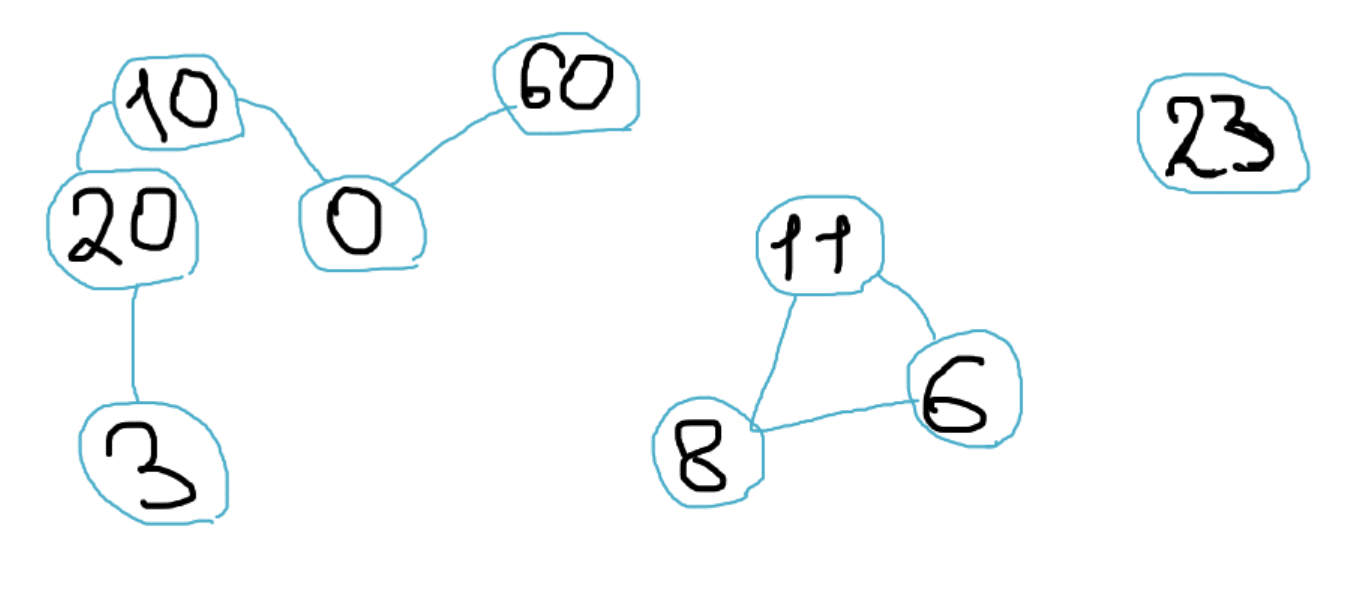

In [3]:
G = Graph(name='Example', nodes=[3, 10, 20, 0, 60, 11, 8, 6, 23],
         edges=[(10, 0), (20, 10), (20, 3), (0, 60), (8, 11), (6, 11), (6, 8)])

# G.add_edge(10, 0)
# G.add_edge(20, 10)
# G.add_edge(20, 3)
# G.add_edge(0, 60)

# G.add_edge(8, 11)
# G.add_edge(6, 11)
# G.add_edge(6, 8)

print(G)

Graph <Example> with 9 nodes and 7 edges


# Компоненты связности

In [4]:
number, largest_num, components = DFS_with_cc(G, largest=True)
print(f'Число компонент - {number}')
print(f'Компоненты:\n{components}')
print(f'Наибольшая компонента:\n{components[largest_num]}')

Число компонент - 3
Компоненты:
{1: {0, 3, 10, 20, 60}, 2: {8, 11, 6}, 3: {23}}
Наибольшая компонента:
{0, 3, 10, 20, 60}


In [5]:
# наибольшая компонента
largest_component = G.subgraph(nodes=[0, 3, 10, 20, 60])
print(largest_component)

Graph <subgraph::Example> with 5 nodes and 4 edges


In [6]:
print('Вершины наибольшей компоненты: ', largest_component.nodes)
print('Ребра наибольшей компоненты: ', largest_component.edges)

Вершины наибольшей компоненты:  {0, 3, 20, 10, 60}
Ребра наибольшей компоненты:  {0: [10, 60], 3: [20], 10: [0, 20], 20: [10, 3], 60: [0]}


In [7]:
# случайный выбор 3х вершин из наибольшей компоненты
largest_component.random_selection(3)

[20, 0, 60]

# Поиск геодезического расстояния

In [8]:
def print_geo(u, dict_with_geo):
    for v in dict_with_geo.keys():
        if dict_with_geo[v] > 0:
            print(f'{u} ~[geo]~> {v}: {dict_with_geo[v]}')

In [9]:
geodesic23 = BFS_geodesic(G, 23)
print(geodesic23)

{0: -1, 3: -1, 6: -1, 8: -1, 10: -1, 11: -1, 20: -1, 23: 0, 60: -1}


In [10]:
geodesic11 = BFS_geodesic(G, 11)
print_geo(11, geodesic11)

11 ~[geo]~> 6: 1
11 ~[geo]~> 8: 1


In [11]:
geodesic10 = BFS_geodesic(G, 10)
print_geo(10, geodesic10)

10 ~[geo]~> 0: 1
10 ~[geo]~> 3: 2
10 ~[geo]~> 20: 1
10 ~[geo]~> 60: 2


In [12]:
geodesic10_largest = BFS_geodesic(G, 10, largest=True)
print('Наибольшее геодезическое расстояние от вершины 10: ', geodesic10_largest)

Наибольшее геодезическое расстояние от вершины 10:  2


In [34]:
diam, node = diameter(largest_component, with_node=True)
print(f'Диаметр наибольшей компоненты связности: {diam}. Он достигается при старте из вершины {node}')

radius, node = radius(largest_component, with_central=True)
print(f'Диаметр наибольшей компоненты связности: {radius}. Центральной вершиной графа является {node}')

Наибольшее геодезическое расстояние в графе: 4
Необходимо стартовать из вершины 3
